In [17]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import datetime
import joblib

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = "/content/drive/MyDrive/sensorsdata.csv"
df = pd.read_csv(file_path)
print(df.head())

    id  temperature  humidity         timeRecorded  ldrValue
0  202         29.7      76.1  2025-02-18 17:22:28    4095.0
1  203         29.6      76.1  2025-02-18 17:22:33    4095.0
2  204         29.7      76.1  2025-02-18 17:22:39    4095.0
3  205         29.7      76.1  2025-02-18 17:22:46    4095.0
4  206         29.7      76.0  2025-02-18 17:22:51    4095.0


In [4]:
print(df.columns)  # Display all column names

Index(['id', 'temperature', 'humidity', 'timeRecorded', 'ldrValue'], dtype='object')


In [5]:

df.drop(columns=['id'], inplace=True)
print(df.head())

   temperature  humidity         timeRecorded  ldrValue
0         29.7      76.1  2025-02-18 17:22:28    4095.0
1         29.6      76.1  2025-02-18 17:22:33    4095.0
2         29.7      76.1  2025-02-18 17:22:39    4095.0
3         29.7      76.1  2025-02-18 17:22:46    4095.0
4         29.7      76.0  2025-02-18 17:22:51    4095.0


In [6]:
df['timeRecorded'] = pd.to_datetime(df['timeRecorded'])  # Convert to datetime

df = df[(df['temperature'] > 0) & (df['humidity'] > 0)]

In [7]:
# Feature extraction from timestamp
df['hour'] = df['timeRecorded'].dt.hour
df['minute'] = df['timeRecorded'].dt.minute
df['day_of_week'] = df['timeRecorded'].dt.dayofweek


In [9]:
 #Features and target
features = ['humidity', 'ldrValue', 'hour', 'minute', 'day_of_week']
target = 'temperature'

In [10]:
print(df.head())

   temperature  humidity        timeRecorded  ldrValue  hour  minute  \
0         29.7      76.1 2025-02-18 17:22:28    4095.0    17      22   
1         29.6      76.1 2025-02-18 17:22:33    4095.0    17      22   
2         29.7      76.1 2025-02-18 17:22:39    4095.0    17      22   
3         29.7      76.1 2025-02-18 17:22:46    4095.0    17      22   
4         29.7      76.0 2025-02-18 17:22:51    4095.0    17      22   

   day_of_week  
0            1  
1            1  
2            1  
3            1  
4            1  


Model MAE: 0.04°C


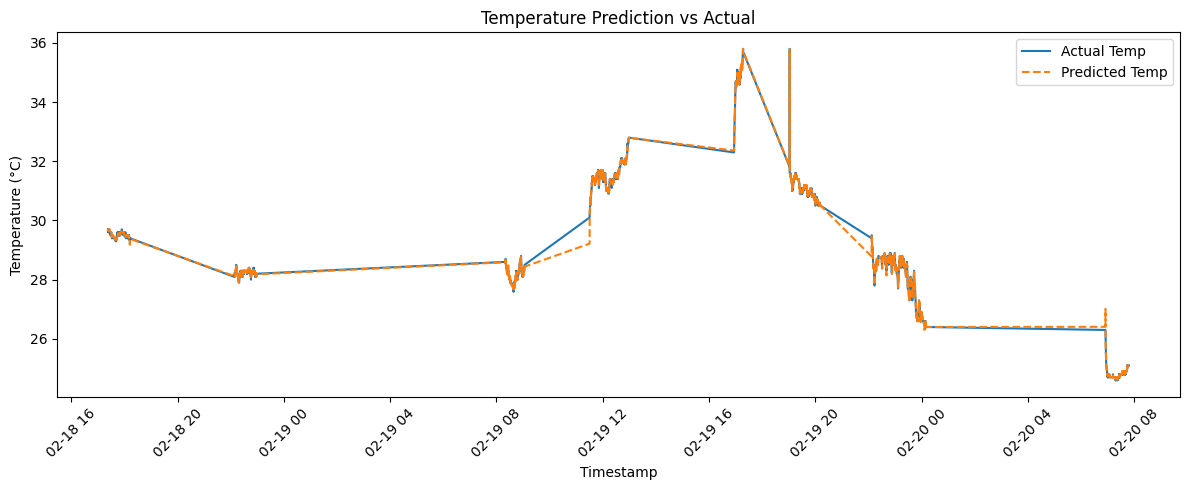

In [16]:
# Train-test split
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluation
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Model MAE: {mae:.2f}°C")

# Predict on the entire dataset to visualize trends
df['predicted_temp'] = model.predict(X)

# Plot
plt.figure(figsize=(12, 5))
plt.plot(df['timeRecorded'], df['temperature'], label='Actual Temp')
plt.plot(df['timeRecorded'], df['predicted_temp'], label='Predicted Temp', linestyle='--')
plt.legend()
plt.title("Temperature Prediction vs Actual")
plt.xlabel("Timestamp")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
joblib.dump(model, "temperature_predictor.pkl")

['temperature_predictor.pkl']

In [20]:
# Load saved model
model = joblib.load("temperature_predictor.pkl")
file_path_1 = "/content/drive/MyDrive/sensorsdata (1).csv"
new_df = pd.read_csv(file_path_1)

         timeRecorded  humidity  ldrValue  predicted_temperature
1 2025-02-17 23:51:06      67.8       0.0                31.0815
2 2025-02-18 10:40:00      67.8     300.0                31.4030
3 2025-02-18 11:40:23      65.0       0.0                31.5450
4 2025-02-18 11:40:29      65.1       0.0                31.5460
5 2025-02-18 11:40:34      65.3       0.0                31.5460


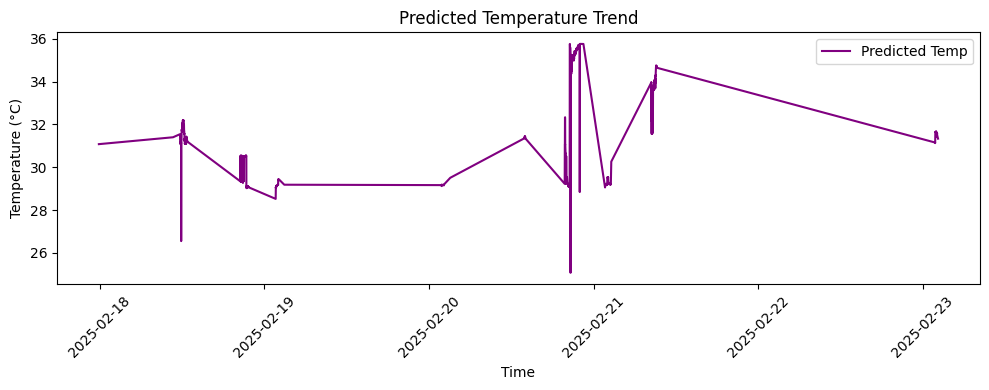

In [23]:
new_df['timeRecorded'] = pd.to_datetime(new_df['timeRecorded'])

# Clean and extract features
new_df = new_df[(new_df['humidity'] > 0) & (new_df['temperature'] > 0)]  # Optional
new_df['hour'] = new_df['timeRecorded'].dt.hour
new_df['minute'] = new_df['timeRecorded'].dt.minute
new_df['day_of_week'] = new_df['timeRecorded'].dt.dayofweek

# Same features as before
features = ['humidity', 'ldrValue', 'hour', 'minute', 'day_of_week']
X_new = new_df[features]

# Predict temperature
new_df['predicted_temperature'] = model.predict(X_new)

# Show predictions
print(new_df[['timeRecorded', 'humidity', 'ldrValue', 'predicted_temperature']].head())

# Optional: plot
plt.figure(figsize=(10, 4))
plt.plot(new_df['timeRecorded'], new_df['predicted_temperature'], label='Predicted Temp', color='purple')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.title('Predicted Temperature Trend')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()